In [ ]:
  Regression Analysis on  "Housing/property price prediction"

In [7]:
#!pip install matplotlib
!pip install scikit-learn



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [55]:
df=pd.read_csv('Housing Price Prediction Dataset.csv')

In [56]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [57]:
display(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [58]:
new_df=df


In [59]:
new_df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


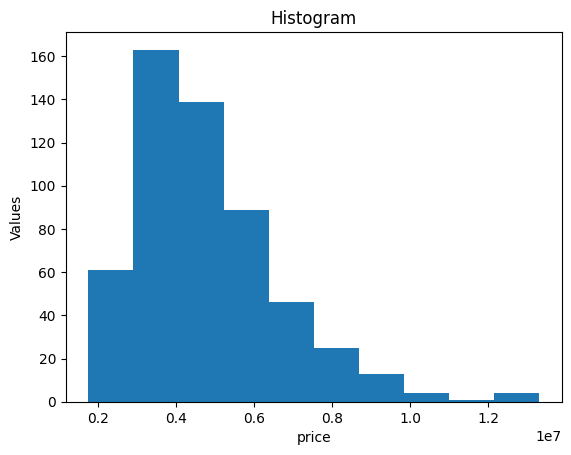

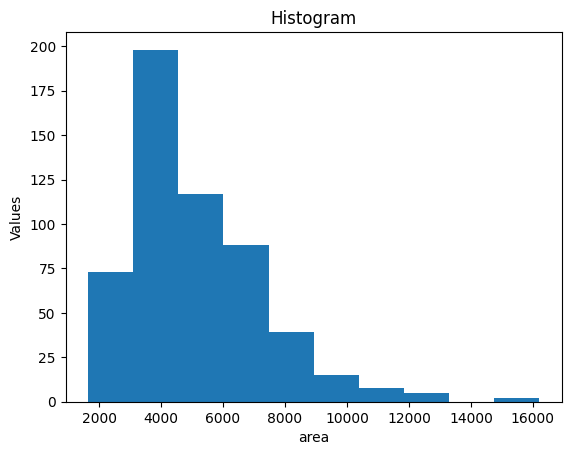

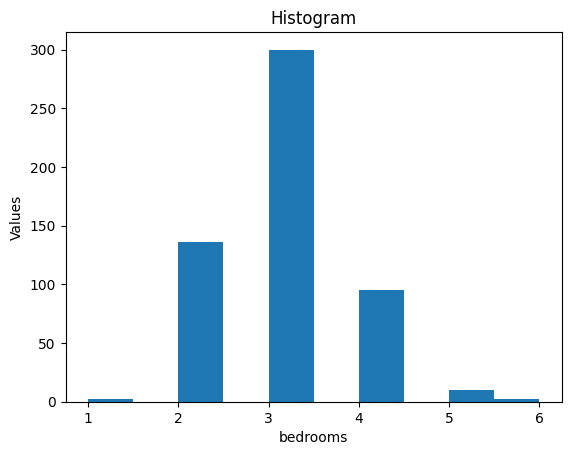

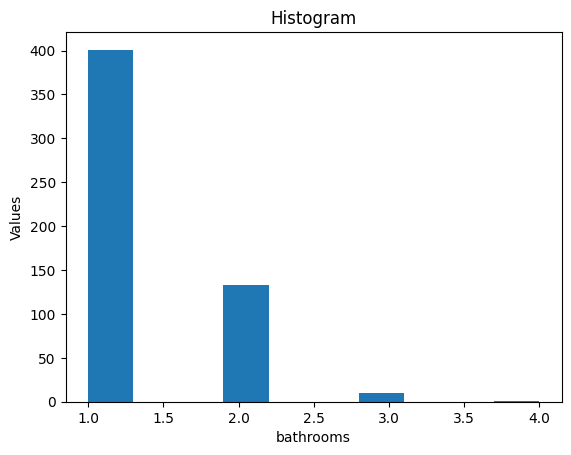

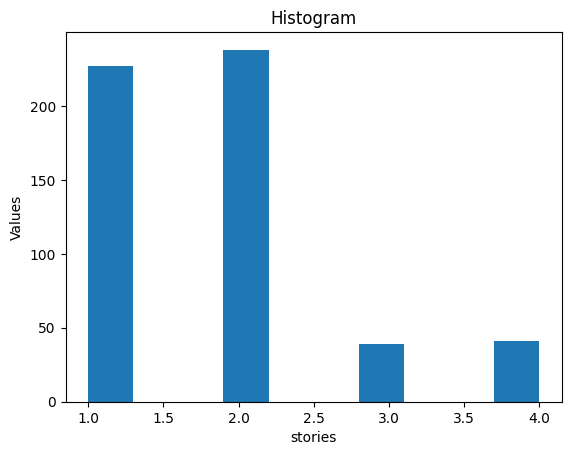

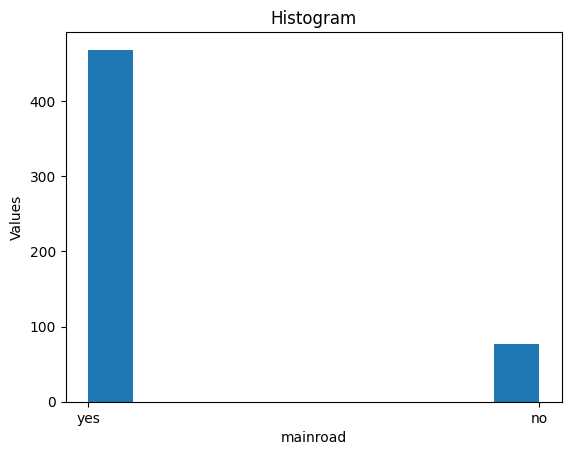

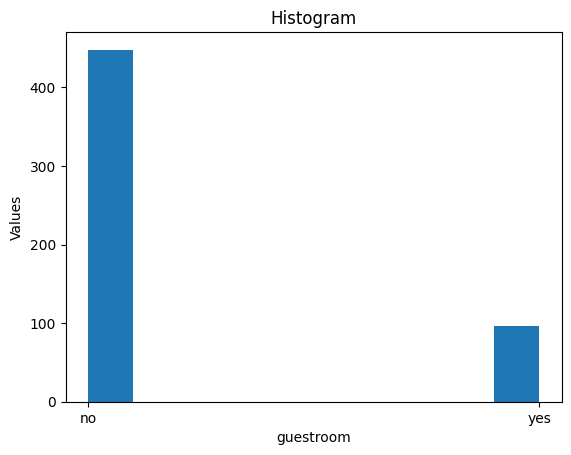

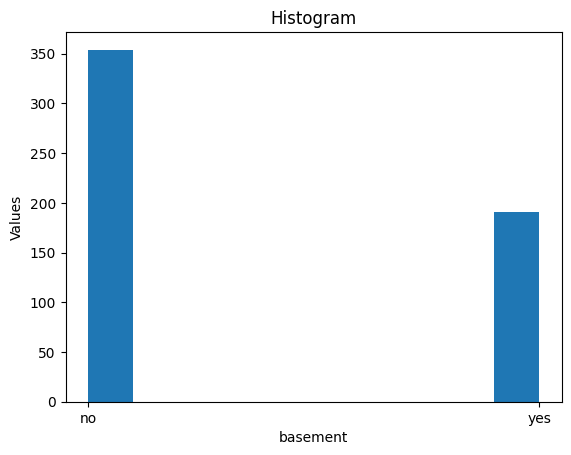

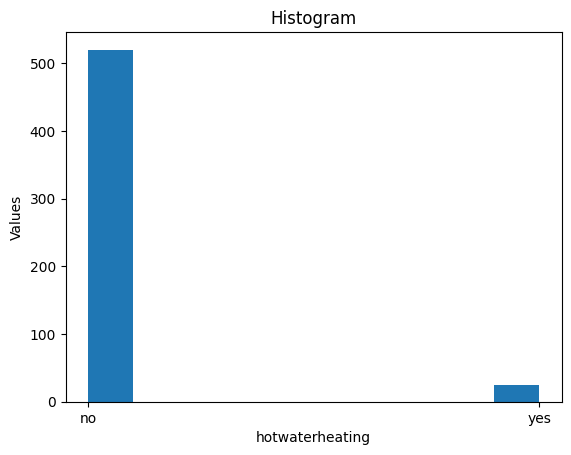

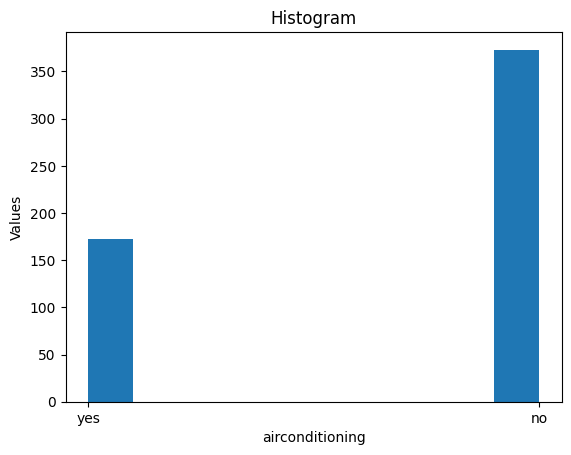

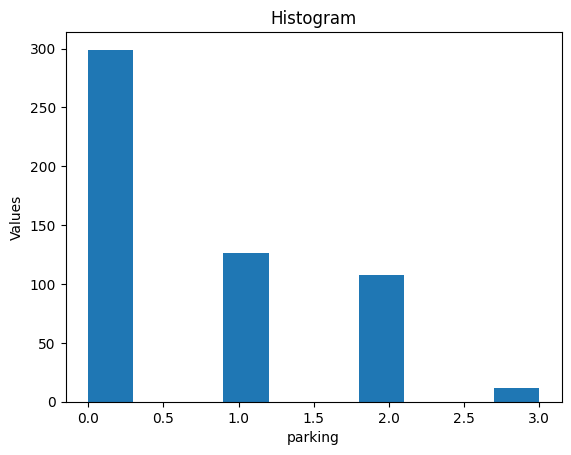

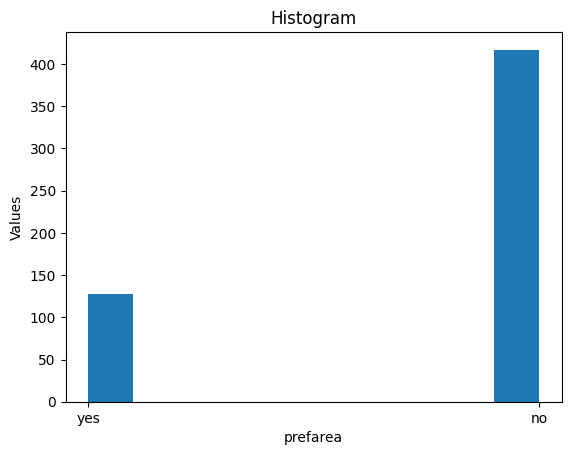

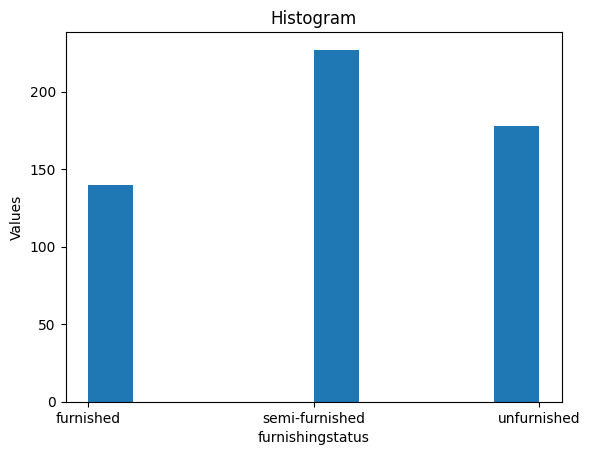

In [60]:
for col in new_df.columns:
  plt.figure()
  plt.hist(df[col])
  plt.title("Histogram")
  plt.xlabel(col)
  plt.ylabel("Values")
plt.show()

In [62]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
categorical_cols=['mainroad','guestroom','hotwaterheating','basement','airconditioning','parking','prefarea','furnishingstatus']
for col in categorical_cols:
    new_df[col+'_encoded']=label_encoder.fit_transform(new_df[col])
    

In [63]:
display(new_df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,prefarea,furnishingstatus,mainroad_encoded,guestroom_encoded,hotwaterheating_encoded,basement_encoded,airconditioning_encoded,parking_encoded,prefarea_encoded,furnishingstatus_encoded
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,yes,furnished,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,no,furnished,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,yes,semi-furnished,1,0,0,1,0,2,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,yes,furnished,1,0,0,1,1,3,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,no,furnished,1,1,0,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,...,no,unfurnished,1,0,0,1,0,2,0,2
541,1767150,2400,3,1,1,no,no,no,no,no,...,no,semi-furnished,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,yes,no,no,no,no,...,no,unfurnished,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,no,no,no,no,no,...,no,furnished,0,0,0,0,0,0,0,0


In [64]:
encoded_dropped=new_df.drop(columns=['mainroad','guestroom','hotwaterheating','basement','airconditioning','parking','prefarea','furnishingstatus'])

In [65]:
print(encoded_dropped)

        price  area  bedrooms  bathrooms  stories  mainroad_encoded  \
0    13300000  7420         4          2        3                 1   
1    12250000  8960         4          4        4                 1   
2    12250000  9960         3          2        2                 1   
3    12215000  7500         4          2        2                 1   
4    11410000  7420         4          1        2                 1   
..        ...   ...       ...        ...      ...               ...   
540   1820000  3000         2          1        1                 1   
541   1767150  2400         3          1        1                 0   
542   1750000  3620         2          1        1                 1   
543   1750000  2910         3          1        1                 0   
544   1750000  3850         3          1        2                 1   

     guestroom_encoded  hotwaterheating_encoded  basement_encoded  \
0                    0                        0                 0   
1        

In [66]:
from sklearn.model_selection import train_test_split
x=encoded_dropped.drop(columns=['price'])
y=encoded_dropped['price']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

linear_model = LinearRegression()
linear_model = linear_model.fit(X_train,y_train)    #error 1
y_pred = linear_model.predict(X_test)

print(f"Scale Parameter : {linear_model.coef_}")
print("Intercept Parameter : ",linear_model.intercept_)
print("R^2 Score : ",r2_score(y_test,y_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))

Scale Parameter : [ 2.24082634e+02  1.41829551e+05  9.18229351e+05  4.56920719e+05
  5.38784867e+05  2.66141547e+05  1.10766521e+06  2.25534131e+05
  9.86706506e+05  2.53093838e+05  6.62733338e+05 -1.97034674e+05]
Intercept Parameter :  130580.69274014328
R^2 Score :  0.6907993785085315
Mean Absolute Error :  806187.4077939552
Mean Squared Error :  1109332857671.688


In [70]:
percent_error = sklearn.metrics.mean_absolute_percentage_error(y_test, y_pred)
print(percent_error)
print(f"Accuracy is {(1-percent_error)*100}%")


0.18319173100181027
Accuracy is 81.68082689981897%


In [72]:
print("Lets Predict Now : ")
# Taking inputs for the prediction.
area = int(input("Enter the area : "))
bedrooms = int(input("Enter the number of bedrooms : "))
bathrooms = int(input("Enter the number of bathrooms : "))
stories = int(input("Enter the number of stories/level of house : "))
parking = int(input("Enter whether parking present or not (0/1) : "))
mainroad = int(input("Enter whether mainroad is present or not (0/1) : "))
guestroom = int(input("Enter whether guestroom is present or not (0/1) : "))
basement = int(input("Enter whether basement is present or not (0/1) : "))
hotwater = int(input("Enter whether hotwater is present or not (0/1) : "))
ac = int(input("Enter whether airconditioning is present or not (0/1) : "))
pref = int(input("Enter whether the house is present in preferred area or not (0/1) : "))
f_stat = int(input("Enter whether house is furnished/semi/non furnished(0/1/2) : "))
inp = [[area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwater,ac,pref,f_stat]]
price_pred = linear_model.predict(inp)
print(price_pred)


Lets Predict Now : 


Enter the area :  175000
Enter the number of bedrooms :  3
Enter the number of bathrooms :  5
Enter the number of stories/level of house :  5
Enter whether parking present or not (0/1) :  1
Enter whether mainroad is present or not (0/1) :  1
Enter whether guestroom is present or not (0/1) :  1
Enter whether basement is present or not (0/1) :  1
Enter whether hotwater is present or not (0/1) :  1
Enter whether airconditioning is present or not (0/1) :  1
Enter whether the house is present in preferred area or not (0/1) :  0
Enter whether house is furnished/semi/non furnished(0/1/2) :  0


[50024206.67264439]


C:\Users\Smita\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
